In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import skew
from sklearn.cluster import KMeans

In [20]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
file_path = '/content/drive/MyDrive/Colab Notebooks/IPD/Student_stress_data.csv'

# Read data and store in the df variable
df=pd.read_csv(file_path)

# **Data Preprocessing & Exploratory Data Analysis**

In [22]:
# Show first 5 rows of data set
df.head()

,Student_ID,Age,Gender,Field_of_Study,Academic_Year,Employment_Status,Q1,Q2,Q3,Q4,...,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32
0,1,22-24,Female,BIS,4,No,3,4,3,3,...,3,4,1,1,2,4,1,4,2,1
1,2,above 24,Female,BM,1,No,1,2,4,3,...,3,2,4,4,3,1,2,1,4,3
2,3,20-22,Female,BIS,4,No,4,4,4,4,...,2,3,3,4,4,1,2,3,4,2
3,4,above 24,Male,BIS,1,No,2,1,4,3,...,2,1,4,4,1,1,2,3,3,3
4,5,above 24,Male,BIS,3,Yes,1,2,4,3,...,2,3,4,4,1,2,4,4,4,4


In [23]:
#to check the sum of missing values
df.isna().sum()

,0
Student_ID,0
Age,0
Gender,0
Field_of_Study,0
Academic_Year,0
Employment_Status,0
Q1,0
Q2,0
Q3,0
Q4,0


In [24]:
# Basic statistics for numerical columns
print(df.describe())

       Student_ID  Academic_Year          Q1         Q2          Q3  \
count  200.000000     200.000000  200.000000  200.00000  200.000000   
mean   100.500000       2.430000    2.420000    2.47000    2.485000   
std     57.879185       1.167009    1.072076    1.10235    1.116246   
min      1.000000       1.000000    1.000000    1.00000    1.000000   
25%     50.750000       1.000000    2.000000    2.00000    1.000000   
50%    100.500000       2.000000    2.000000    2.00000    3.000000   
75%    150.250000       3.250000    3.000000    3.00000    3.000000   
max    200.000000       4.000000    4.000000    4.00000    4.000000   

               Q4         Q5          Q6          Q7          Q8  ...  \
count  200.000000  200.00000  200.000000  200.000000  200.000000  ...   
mean     2.540000    2.42000    2.370000    2.510000    2.555000  ...   
std      1.097462    1.09984    1.090434    1.134166    1.092218  ...   
min      1.000000    1.00000    1.000000    1.000000    1.000000  ..

In [25]:
#Feature Engineering: Average of each section (Academic, Financial, Social...)

# Calculate average stress levels for each section
df["Academic_Stress_Avg"] = df[["Q1", "Q2", "Q3", "Q4", "Q5"]].mean(axis=1)
df["Financial_Stress_Avg"] = df[["Q7", "Q8", "Q9", "Q10"]].mean(axis=1)
df["Social_Stress_Avg"] = df[["Q6", "Q11", "Q12", "Q13", "Q14"]].mean(axis=1)
df["Environmental_Stress_Avg"] = df[["Q15", "Q16", "Q17", "Q18", "Q19"]].mean(axis=1)
df["Coping_Strategies_Avg"] = df[["Q20", "Q21", "Q22", "Q23", "Q24"]].mean(axis=1)

# **Distribution of Stress Levels by Each Section (Academic, Financial, etc..)**

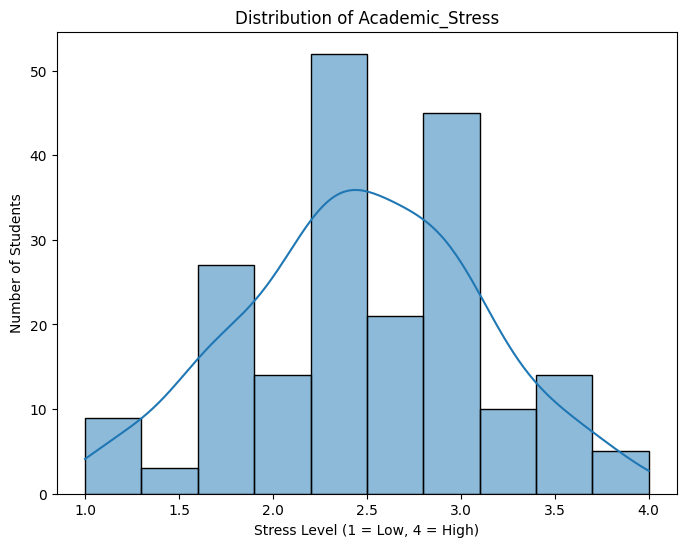

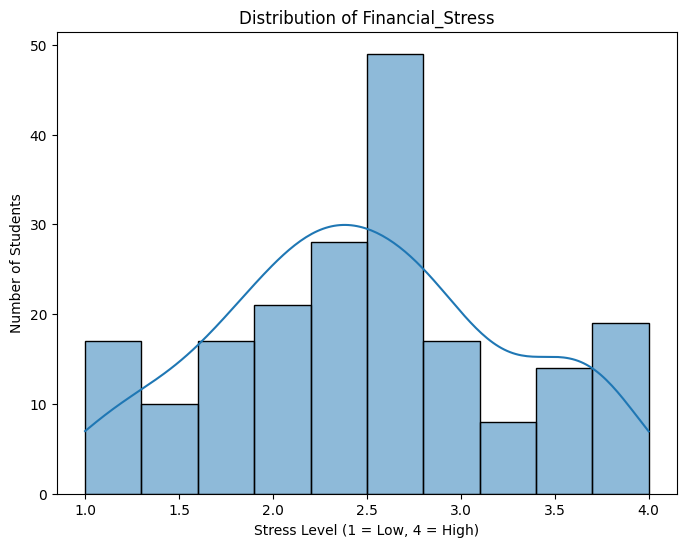

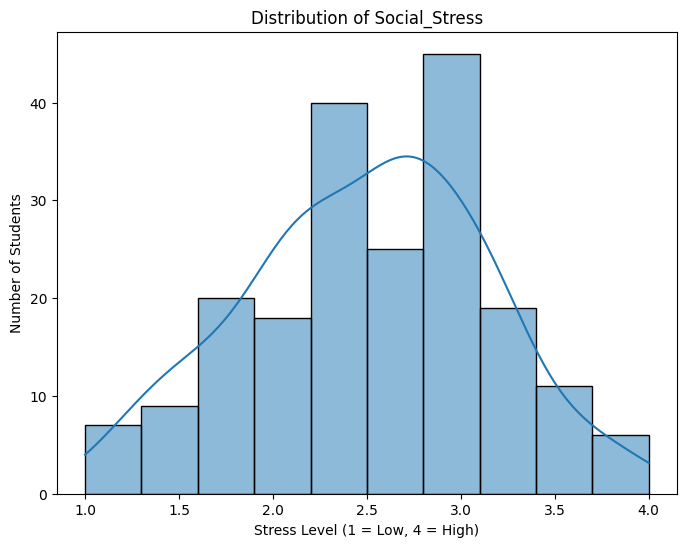

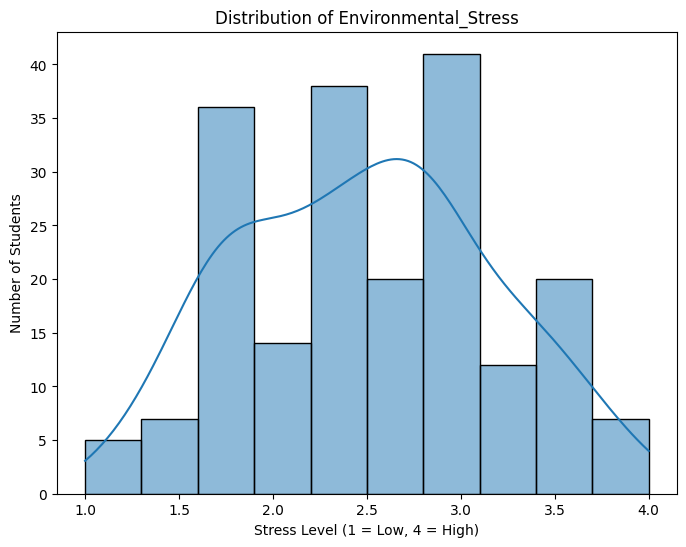

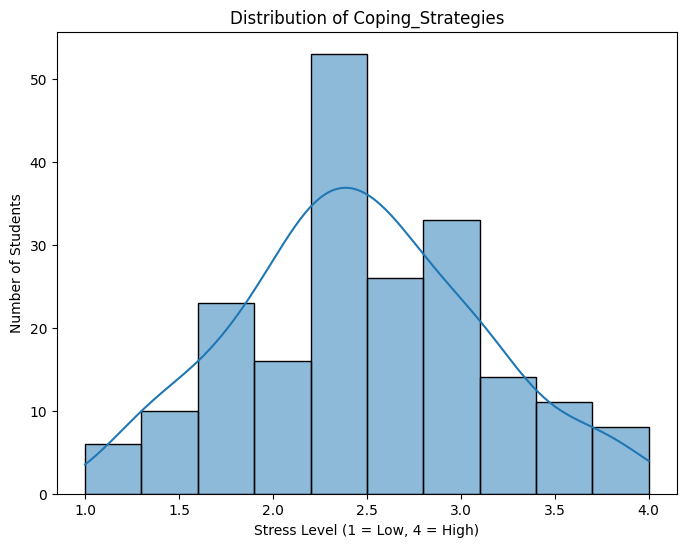

In [26]:
stress_columns = ["Academic_Stress_Avg","Financial_Stress_Avg", "Social_Stress_Avg",
                 "Environmental_Stress_Avg", "Coping_Strategies_Avg"]

for column in stress_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(f"Distribution of {column.replace('_Avg', '')}")
    plt.xlabel("Stress Level (1 = Low, 4 = High)")
    plt.ylabel("Number of Students")
    plt.show()

# **Distribution of Stress Levels By Gender**

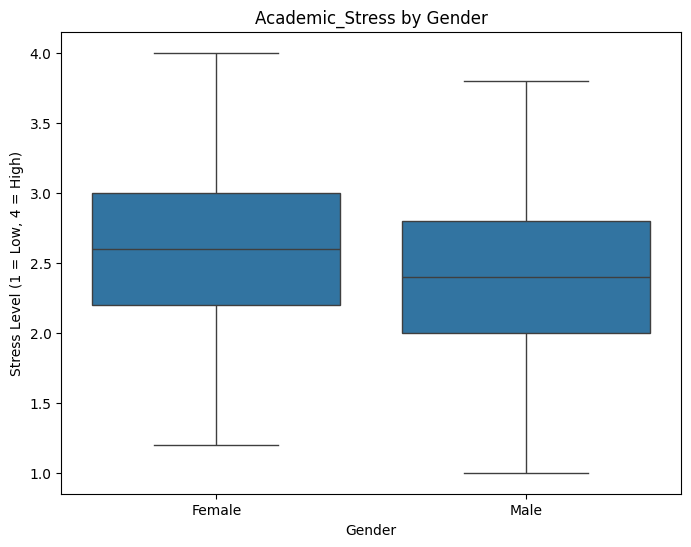

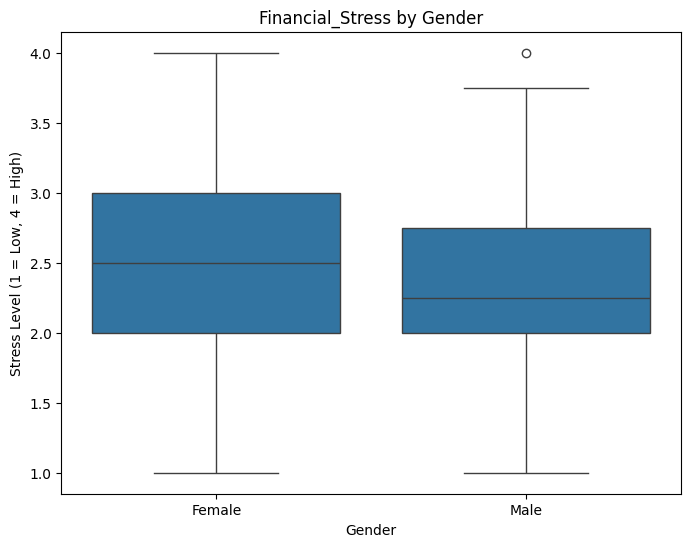

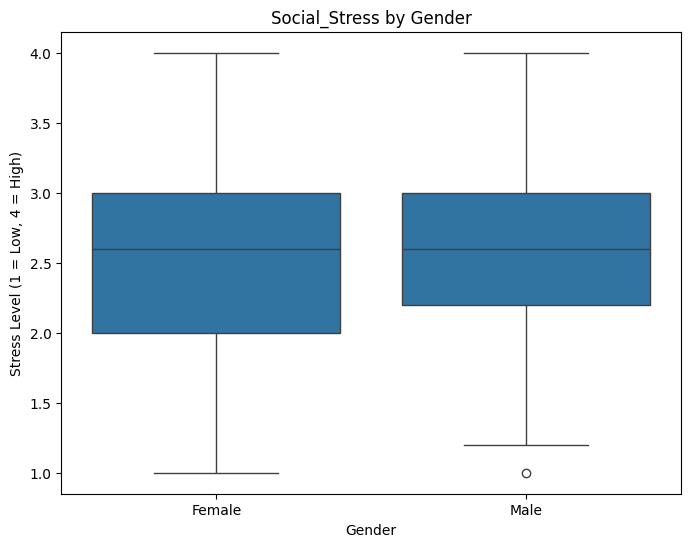

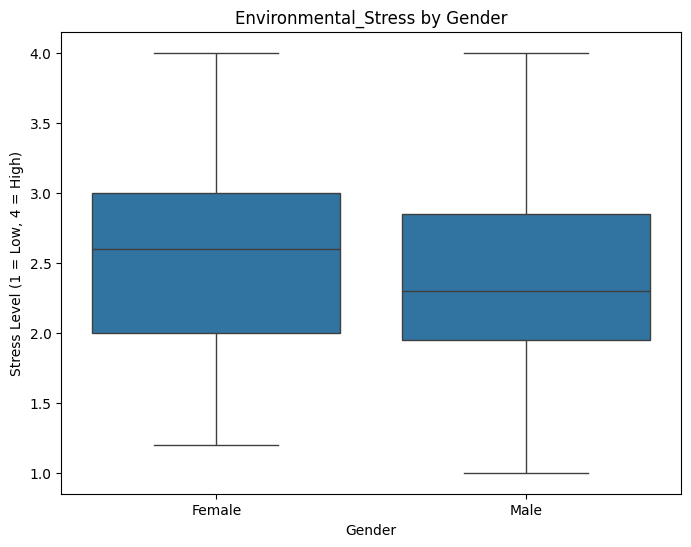

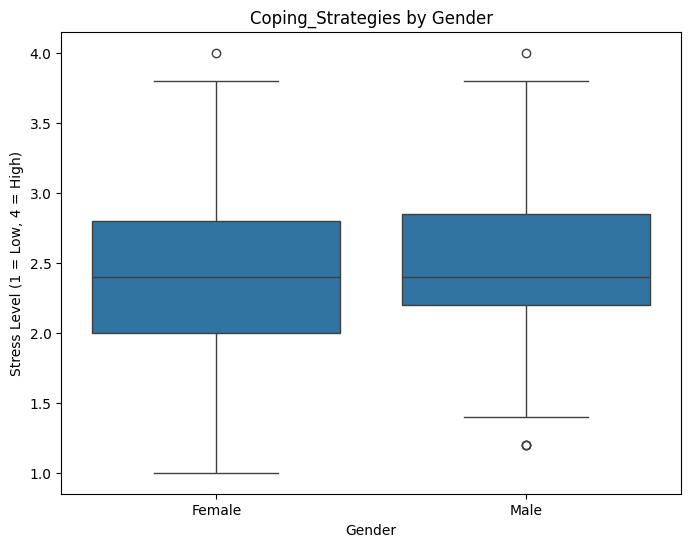

In [27]:
stress_columns = ["Academic_Stress_Avg", "Financial_Stress_Avg", "Social_Stress_Avg",
                 "Environmental_Stress_Avg", "Coping_Strategies_Avg"]

for column in stress_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Gender", y=column, data=df)
    plt.title(f"{column.replace('_Avg', '')} by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Stress Level (1 = Low, 4 = High)")
    plt.show()

# **Distribution of Stress Levels By Academic Year**

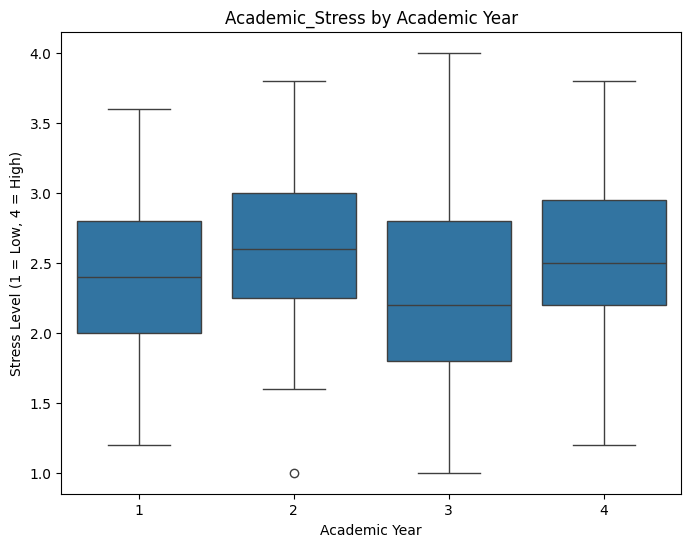

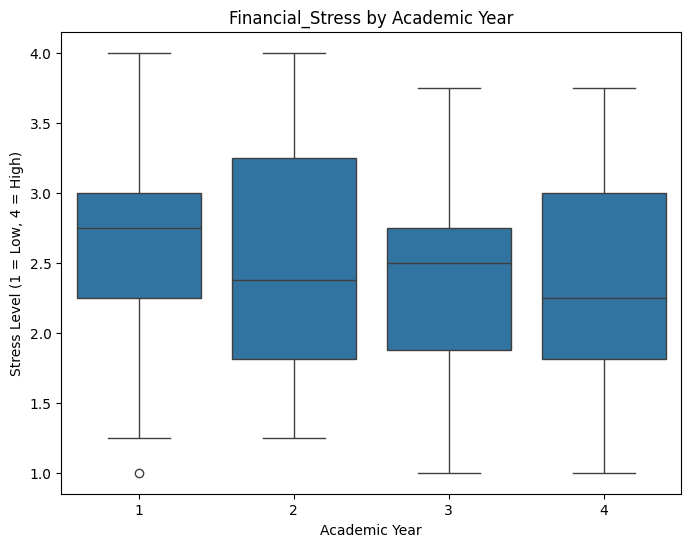

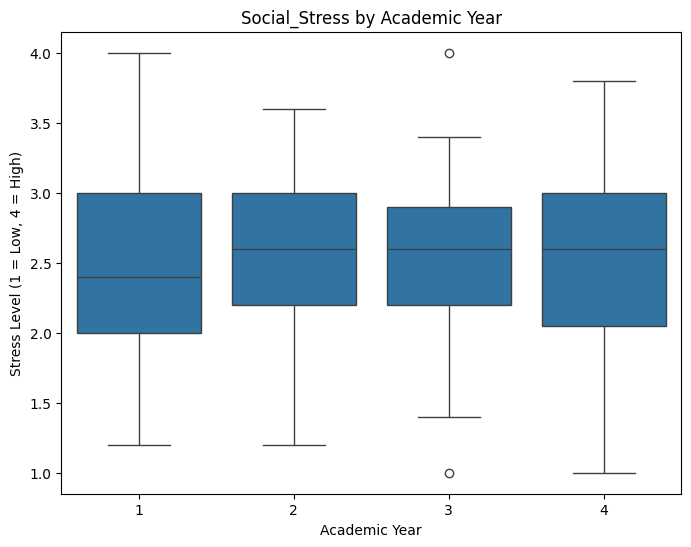

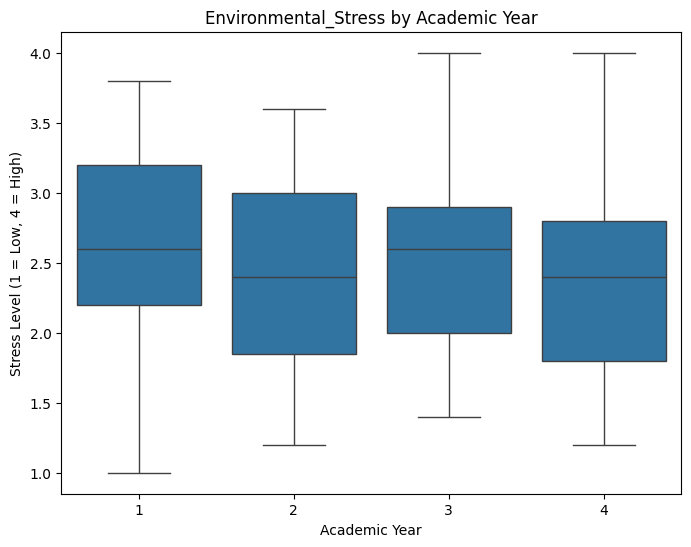

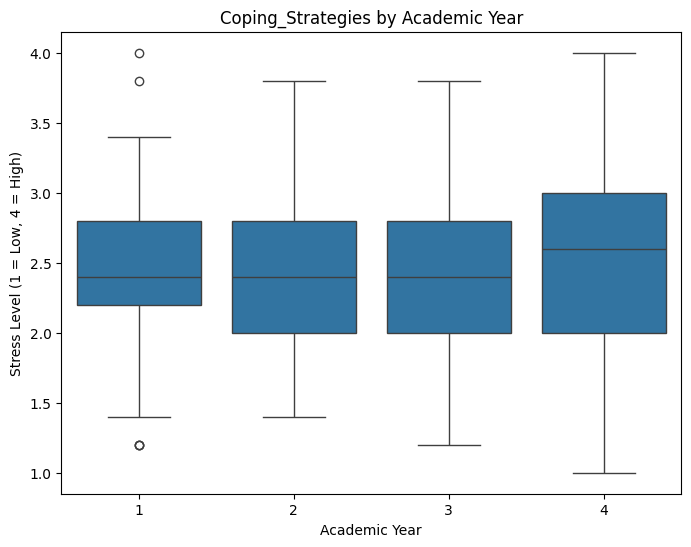

In [28]:
stress_columns = ["Academic_Stress_Avg", "Financial_Stress_Avg", "Social_Stress_Avg",
                 "Environmental_Stress_Avg", "Coping_Strategies_Avg"]

for column in stress_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Academic_Year", y=column, data=df)
    plt.title(f"{column.replace('_Avg', '')} by Academic Year")
    plt.xlabel("Academic Year")
    plt.ylabel("Stress Level (1 = Low, 4 = High)")
    plt.show()

# **Distribution of Stress Levels By Degree Pathway**

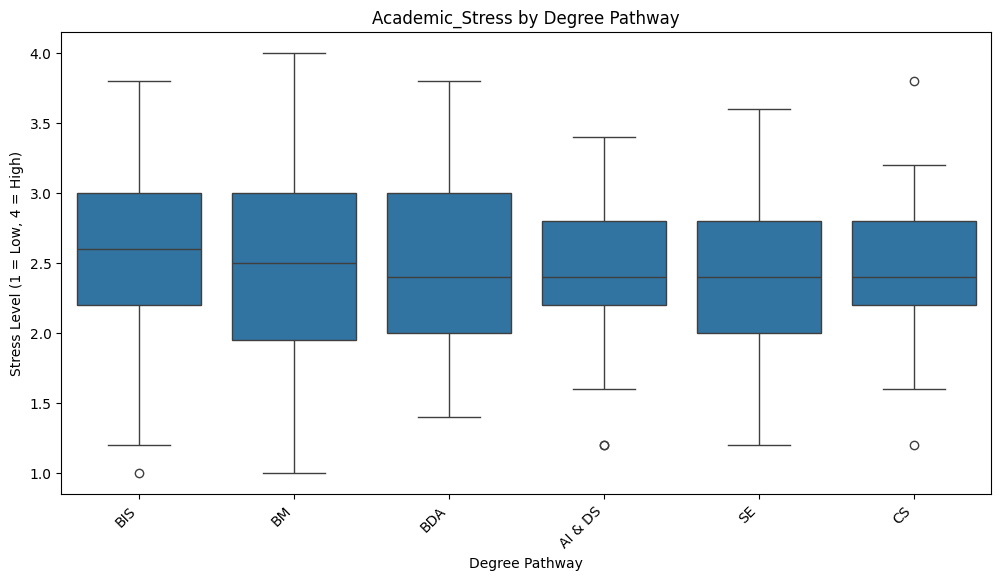

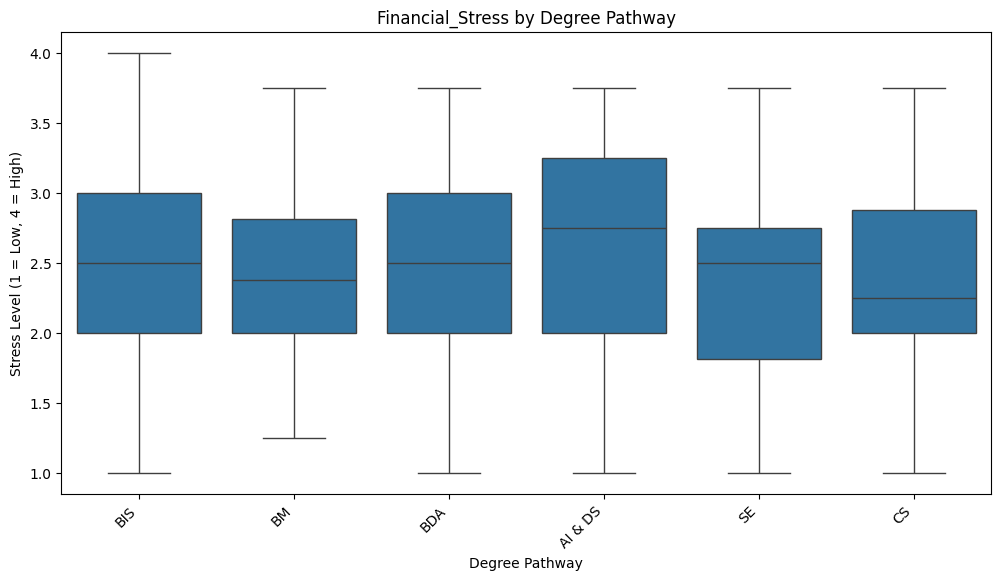

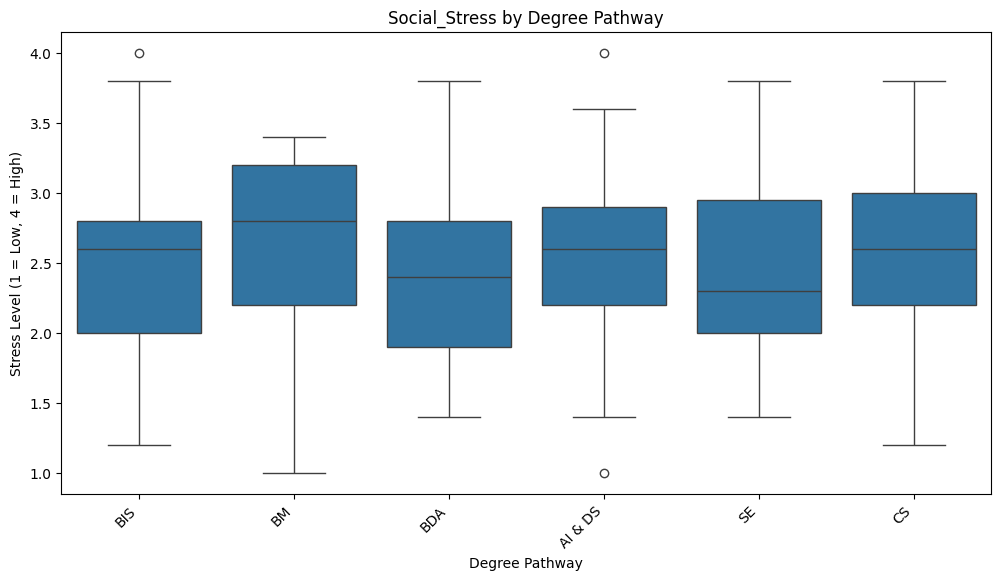

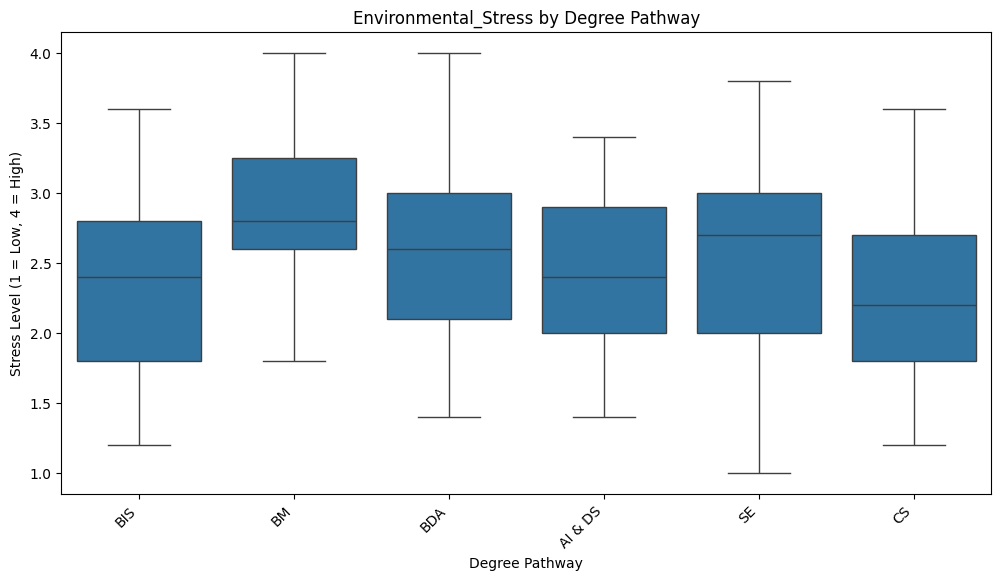

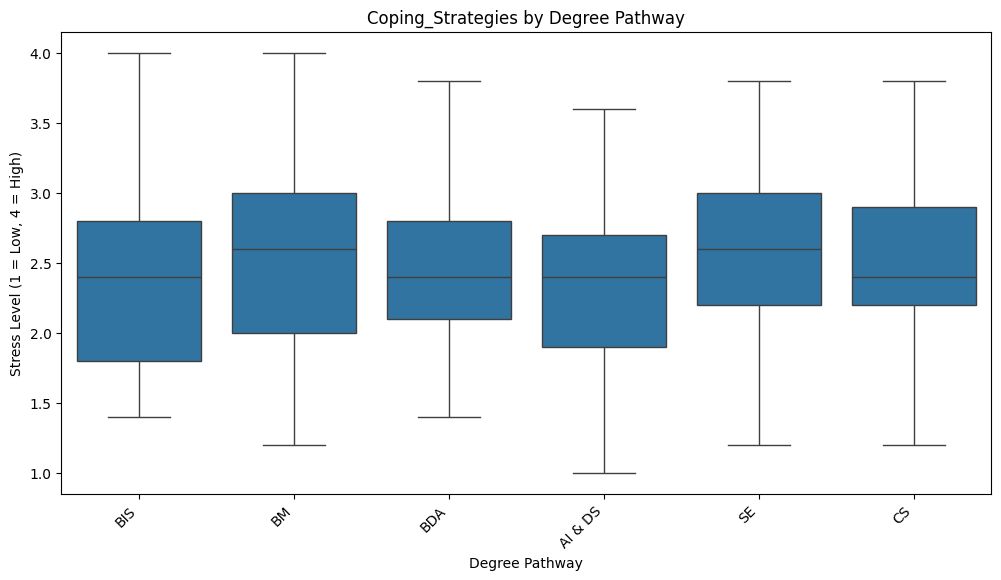

In [29]:
for column in stress_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Field_of_Study", y=column, data=df)
    plt.title(f"{column.replace('_Avg', '')} by Degree Pathway")
    plt.xlabel("Degree Pathway")
    plt.ylabel("Stress Level (1 = Low, 4 = High)")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# **Correlation between Stress Sections**

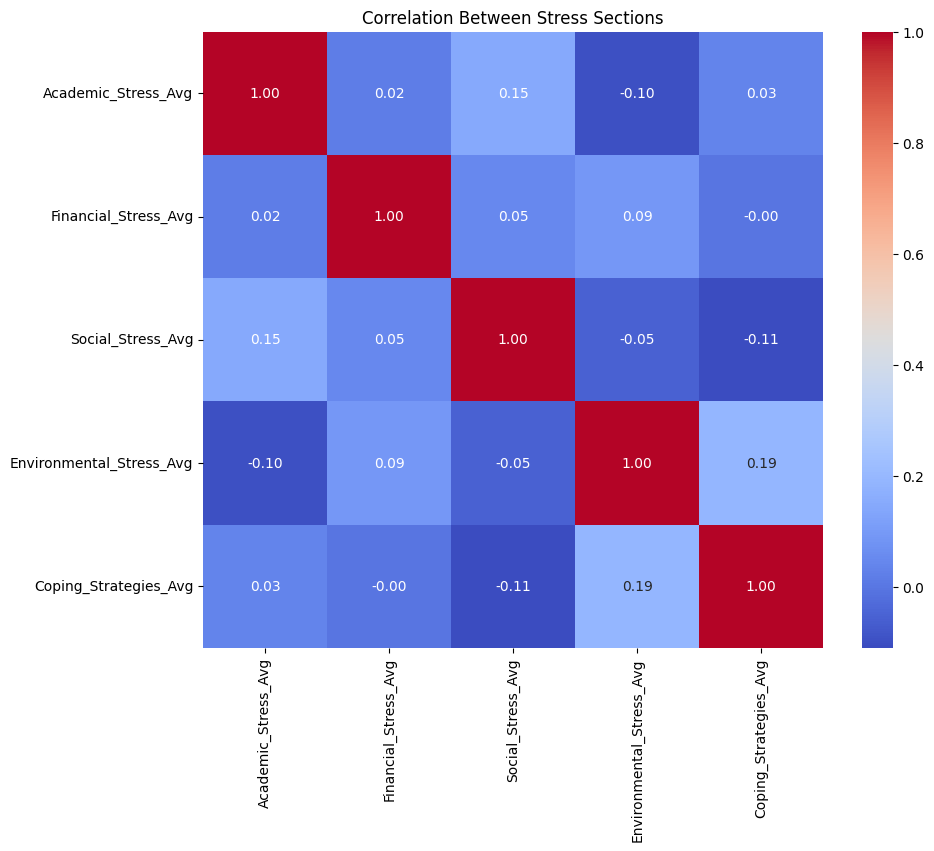

In [30]:
# Correlation matrix for section-wise stress averages
stress_columns = ["Academic_Stress_Avg", "Financial_Stress_Avg", "Social_Stress_Avg",
                 "Environmental_Stress_Avg", "Coping_Strategies_Avg"]

corr_matrix = df[stress_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Stress Sections")
plt.show()

# **Skewness & transformation**

In [31]:
# Seperating the numerical varaible
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculating and printing skewness for each numeric variable
for feature in numeric_cols:
    feature_skewness = skew(df[feature])
    print(f"Skewness of {feature}: {feature_skewness:.2f}")

Skewness of Student_ID: 0.00
Skewness of Academic_Year: 0.06
Skewness of Q1: 0.11
Skewness of Q2: 0.05
Skewness of Q3: -0.02
Skewness of Q4: -0.02
Skewness of Q5: 0.07
Skewness of Q6: 0.18
Skewness of Q7: 0.01
Skewness of Q8: -0.09
Skewness of Q9: 0.16
Skewness of Q10: -0.02
Skewness of Q11: 0.10
Skewness of Q12: 0.06
Skewness of Q13: -0.11
Skewness of Q14: -0.14
Skewness of Q15: -0.03
Skewness of Q16: 0.02
Skewness of Q17: 0.03
Skewness of Q18: 0.08
Skewness of Q19: -0.03
Skewness of Q20: -0.01
Skewness of Q21: 0.09
Skewness of Q22: 0.11
Skewness of Q23: -0.02
Skewness of Q24: 0.08
Skewness of Q25: 0.07
Skewness of Q26: 0.01
Skewness of Q27: 0.16
Skewness of Q28: -0.06
Skewness of Q29: -0.10
Skewness of Q30: -0.21
Skewness of Q31: 0.04
Skewness of Q32: -0.12
Skewness of Academic_Stress_Avg: -0.05
Skewness of Financial_Stress_Avg: 0.05
Skewness of Social_Stress_Avg: -0.12
Skewness of Environmental_Stress_Avg: 0.08
Skewness of Coping_Strategies_Avg: 0.14


### **Skipped skew transformattion because there were no variables with a high skew**

# **Standard Scaler**

In [32]:
#Scale numerical features (using StandardScaler)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])

# **Elbow method**

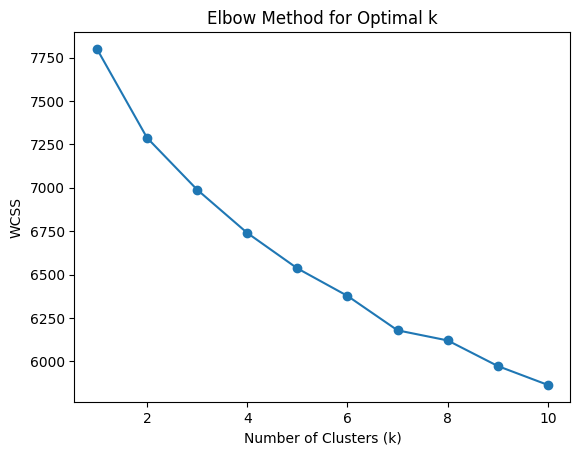

In [33]:
#Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# **Silhouette Analysis**

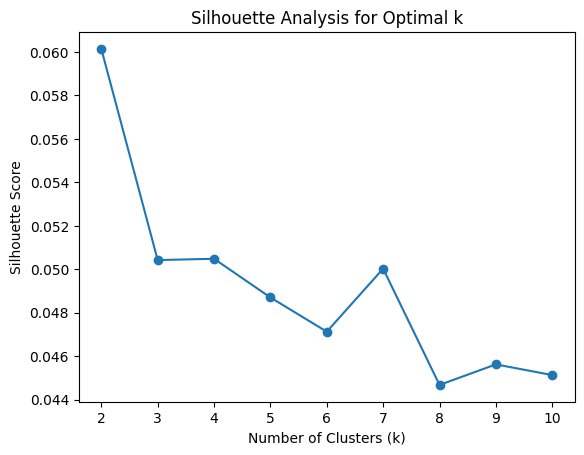

In [34]:
#Silhouette Analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

# Plotting the Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# **K Means Clustering**

         Student_ID  Academic_Year        Q1        Q2        Q3        Q4  \
Cluster                                                                      
0         80.027778       2.083333  1.916667  2.083333  2.944444  3.000000   
1        112.129630       2.259259  2.555556  2.592593  2.555556  2.574074   
2         90.000000       2.553571  1.982143  1.964286  1.928571  2.071429   
3        113.407407       2.703704  3.074074  3.129630  2.685185  2.685185   

               Q5        Q6        Q7        Q8  ...       Q28       Q29  \
Cluster                                          ...                       
0        2.722222  2.694444  2.611111  2.722222  ...  2.861111  2.694444   
1        2.185185  2.129630  2.759259  2.648148  ...  2.685185  2.537037   
2        2.107143  2.035714  2.732143  2.875000  ...  2.107143  2.482143   
3        2.777778  2.740741  1.962963  2.018519  ...  2.740741  2.611111   

              Q30       Q31       Q32  Academic_Stress_Avg  \
Cluster     

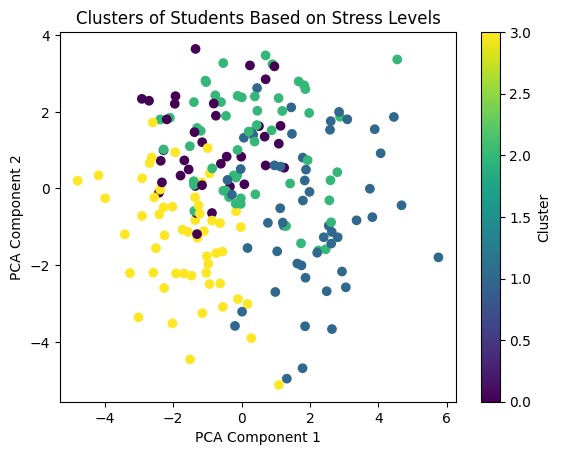

In [35]:
#K-Means
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)


cluster_profiles = df.groupby("Cluster")[numeric_cols].mean()
print(cluster_profiles)

# Visualizing the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters of Students Based on Stress Levels")
plt.colorbar(label="Cluster")
plt.show()